In [1]:
!git clone https://github.com/sanchit2843/image_classification

Cloning into 'image_classification'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 205 (delta 118), reused 145 (delta 63), pack-reused 0
Receiving objects: 100% (205/205), 967.71 KiB | 10.19 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [2]:
#Upload kaggle.json file
!pip install -i https://test.pypi.org/simple/ supportlib
import supportlib.gettingdata as getdata
getdata.kaggle()

Looking in indexes: https://test.pypi.org/simple/


Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 1.14G/1.15G [00:16<00:00, 83.2MB/s]
100% 1.15G/1.15G [00:16<00:00, 73.9MB/s]


In [0]:
getdata.zipextract('/content/chest-xray-pneumonia.zip')

In [0]:
getdata.zipextract('/content/chest_xray.zip')

In [1]:
import os
os.chdir('/content/image_classification')
import dataloader,model,training
from predict import predict
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import torchvision
import numpy as np

/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [0]:
im_size = 256
batch_size = 16
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor()])
train_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/train', transform = train_transforms)
train_loader =  DataLoader(train_data, batch_size = batch_size , shuffle = True)

In [3]:
mean,std = dataloader.normalization_parameter(train_loader)

In [0]:
#image transformations for train and test data
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomRotation(degrees=5),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
test_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#inverse normalization for image plot

inv_normalize =  transforms.Normalize(
    mean=-1*np.divide(mean,std),
    std=1/std
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

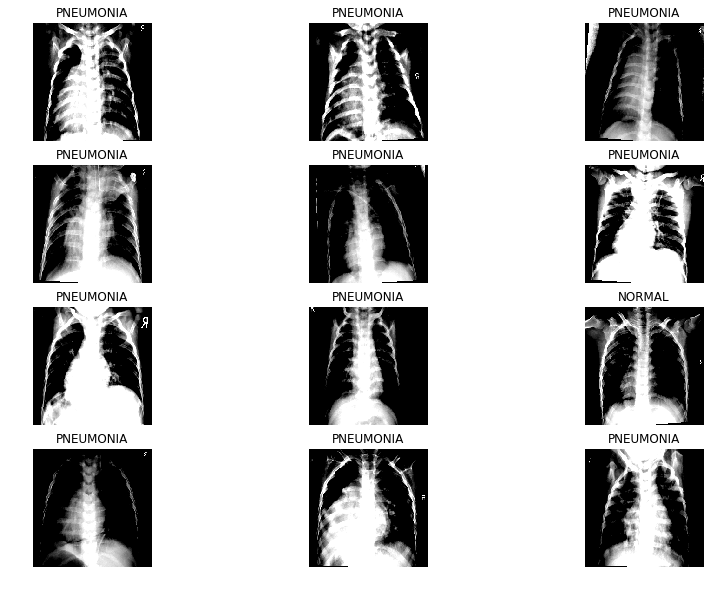

In [27]:
train_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/train', transform = train_transforms)
test_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/test', transform = test_transforms)
valid_data = torchvision.datasets.ImageFolder(root = '/content/chest_xray/val', transform = test_transforms)

#label of classes

classes = train_data.classes
#encoder and decoder to convert classes into integer
decoder = {}
for i in range(len(classes)):
    decoder[classes[i]] = i
encoder = {}
for i in range(len(classes)):
    encoder[i] = classes[i]

dataloaders = dataloader.data_loader(train_data,encoder,test_data, test_data, batch_size = batch_size)

In [34]:
classifier = model.classifier('efficientnet-b0',n_classes = 2,device = 'cuda')

Downloading: "http://storage.googleapis.com/public-models/efficientnet-b0-08094119.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-08094119.pth
100%|██████████| 21383481/21383481 [00:00<00:00, 88871909.30it/s]

Loaded pretrained weights for efficientnet-b0


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


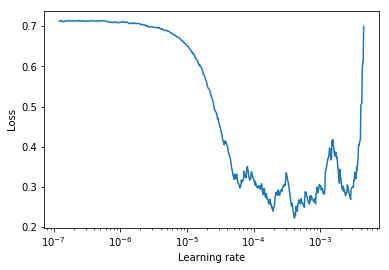

In [28]:
model.lr_finder(classifier,train_loader,'cuda')

In [0]:
# change learning rate value according to lr finder
lr = 0.00001

Epoch: 0
train Epoch: 0  [0/5216 (0%)]	Loss: 0.000001 	Acc: 1.000000
train Epoch: 0  [1600/5216 (31%)]	Loss: 0.003470 	Acc: 0.999381
train Epoch: 0  [3200/5216 (61%)]	Loss: 0.001783 	Acc: 0.999689
train Epoch: 0  [4800/5216 (92%)]	Loss: 0.003210 	Acc: 0.999377
val Epoch: 0  [0/624 (0%)]	Loss: 0.733579 	Acc: 0.875000
Validation loss decreased (inf --> 2.193699).  Saving model ...
val Accuracy: 0.8349358974358974
Epoch: 1
train Epoch: 1  [0/5216 (0%)]	Loss: 0.000000 	Acc: 1.000000
train Epoch: 1  [1600/5216 (31%)]	Loss: 0.001835 	Acc: 0.999381
train Epoch: 1  [3200/5216 (61%)]	Loss: 0.003144 	Acc: 0.999067
train Epoch: 1  [4800/5216 (92%)]	Loss: 0.002279 	Acc: 0.999377
val Epoch: 1  [0/624 (0%)]	Loss: 8.207394 	Acc: 0.500000
EarlyStopping counter: 1 out of 5
val Accuracy: 0.8108974358974359
Epoch: 2
train Epoch: 2  [0/5216 (0%)]	Loss: 0.000000 	Acc: 1.000000
train Epoch: 2  [1600/5216 (31%)]	Loss: 0.000067 	Acc: 1.000000
train Epoch: 2  [3200/5216 (61%)]	Loss: 0.001452 	Acc: 0.999378
tra

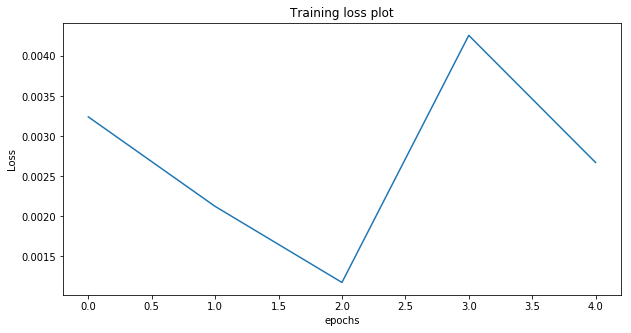

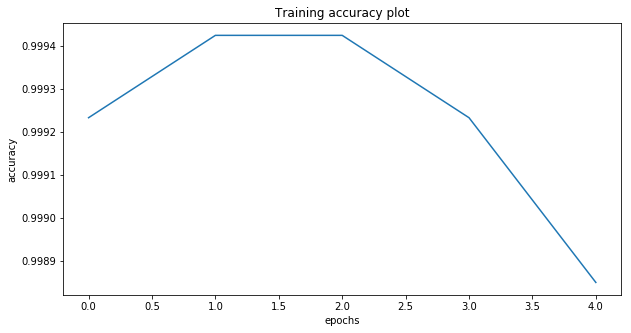

tensor(0.8429, device='cuda:0', dtype=torch.float64) 2.6931467217226057
Classes in order Actual and Predicted


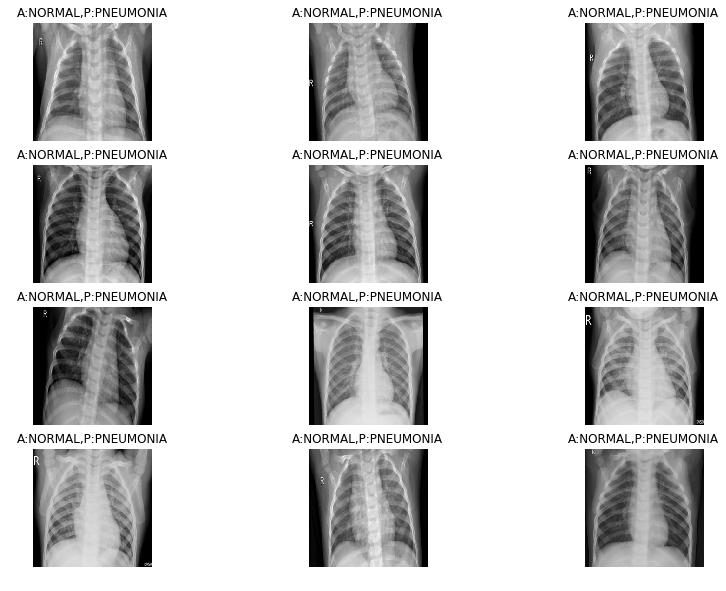

Precision: 89.95901639344262 Recall: 79.05982905982907, Accuracy: 84.2948717948718: ,f1_score: 81.1758911531121
Confusion matrix, without normalization
[[136  98]
 [  0 390]]


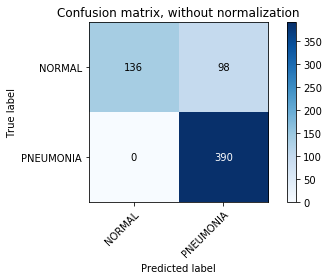

In [39]:
# Dataloaders is a dictionary returned by data_loader function
# Patience is the parameter of early stopping. If the val loss is not reduced for 5 epochs the loop will be breaked and training will be interrupted
# Classes is a dictionary of the name of classes in dataset
training.train_model(classifier,dataloaders,encoder,inv_normalize,num_epochs=5,lr = lr,batch_size = batch_size,patience = 5,classes = classes)

In [0]:
import cv2
image = cv2.imread('/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
predict(classifier,image,'cuda',encoder,test_transforms,inv_normalize)